In [1]:
#!pip install finance-datareader

In [2]:
#!pip install seaborn

In [3]:
#!pip install yfinance

In [4]:
#!pip install pandas

In [5]:
#!pip install plotly

In [6]:
import FinanceDataReader as fdr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 스타일 지정
# plt.style.use('ggplot')

# matplotlib 한글폰트 지정
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)

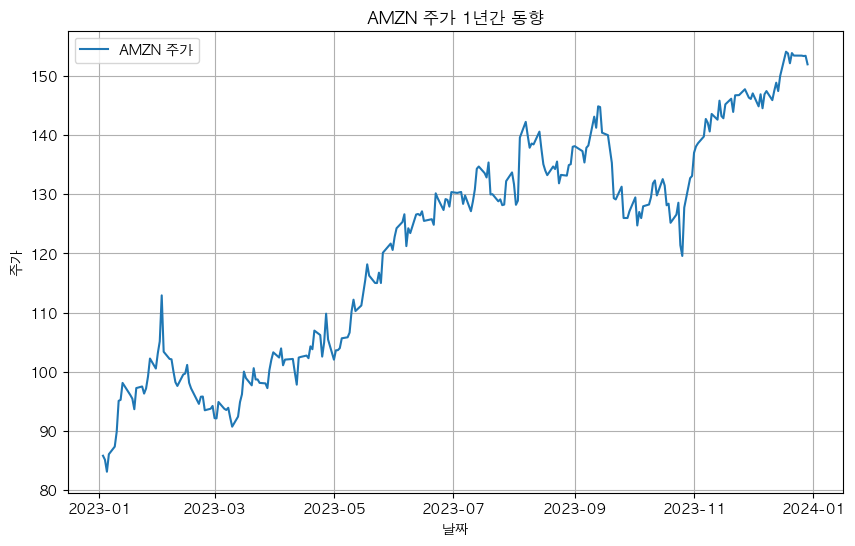

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# AMZ(Amazon)의 주가 데이터 가져오기
amz_stock = fdr.DataReader('AMZN', '2023-01-01', '2024-01-01')

# 주가 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(amz_stock['Close'], label='AMZN 주가')
plt.title('AMZN 주가 1년간 동향')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid(True)
plt.show()

           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2023-12-31             60407715.914073           0.223732     27949000000.0   
2023-09-30            204700303.552383           0.189187     24044000000.0   
2023-06-30             10418088.060294           0.106307     19894000000.0   
2023-03-31            -77101238.164603           0.230153     16400000000.0   
2022-12-31                -630420000.0               0.21     15879000000.0   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2023-12-31         270000000.0                            270000000.0   
2023-09-30        1082000000.0                           1082000000.0   
2023-06-30          98000000.0                             98000000.0   
2023-03-31        -335000000.0                           -335000000.0   
2022-12-31       -3002000000.0                          -3002000000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2023-12-31   

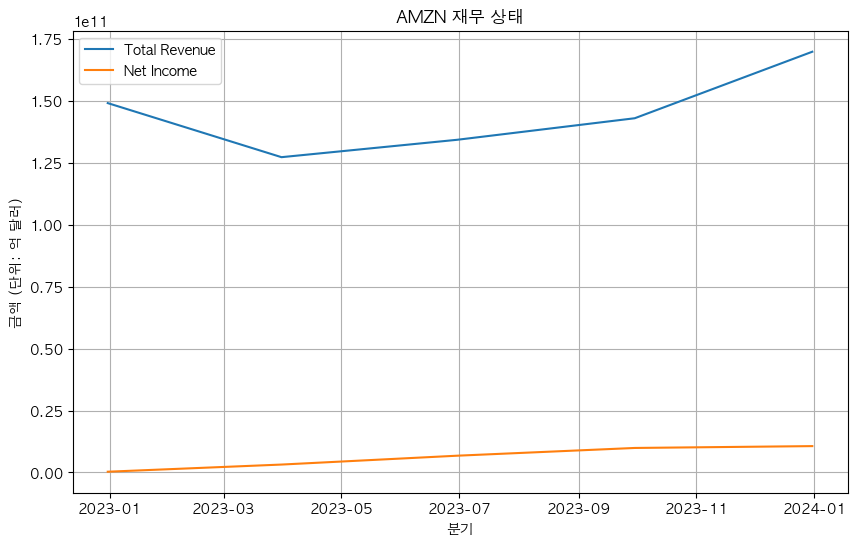

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# AMZ(Amazon)의 재무 데이터 가져오기
amz_info = yf.Ticker('AMZN')
amz_financials = amz_info.quarterly_financials.T

# 전체 재무 데이터 확인
print(amz_financials)

# 필요한 재무 지표 선택
selected_metrics = ['Total Revenue', 'Net Income']

# 재무 데이터 시각화
plt.figure(figsize=(10, 6))
for metric in selected_metrics:
    plt.plot(amz_financials.index, amz_financials[metric], label=metric)

plt.title('AMZN 재무 상태')
plt.xlabel('분기')
plt.ylabel('금액 (단위: 억 달러)')
plt.legend()
plt.grid(True)
plt.show()


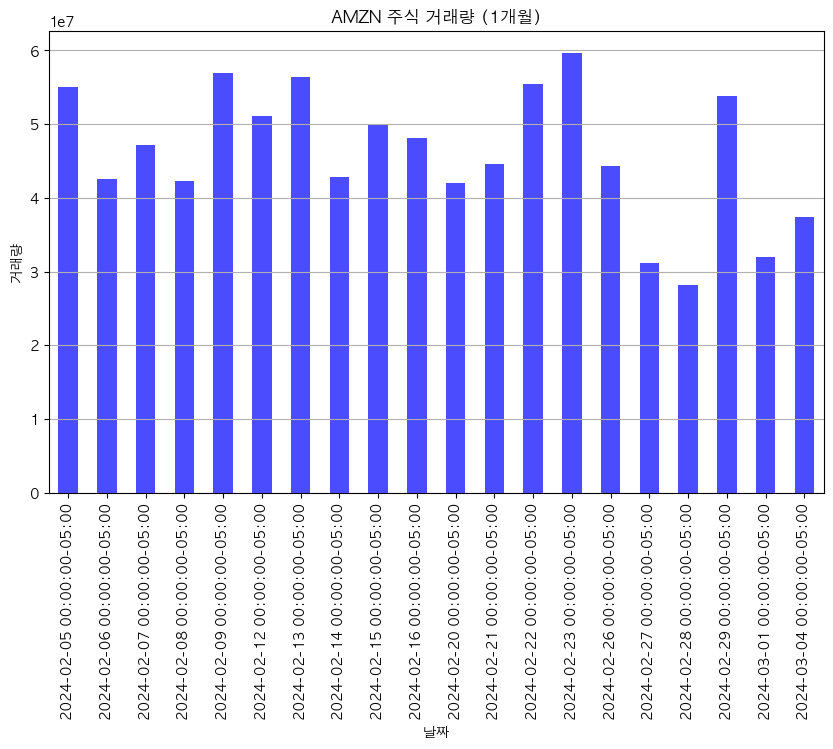

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

# AMZN(Amazon)의 주식 데이터 가져오기
amzn_stock = yf.Ticker('AMZN')

# 최근 1달 간의 주식 데이터 가져오기
amzn_data = amzn_stock.history(period='1mo')

# 주식 거래량 차트 시각화
plt.figure(figsize=(10, 6))
amzn_data['Volume'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('AMZN 주식 거래량 (1개월)')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.grid(axis='y')
plt.show()


[*********************100%%**********************]  1 of 1 completed


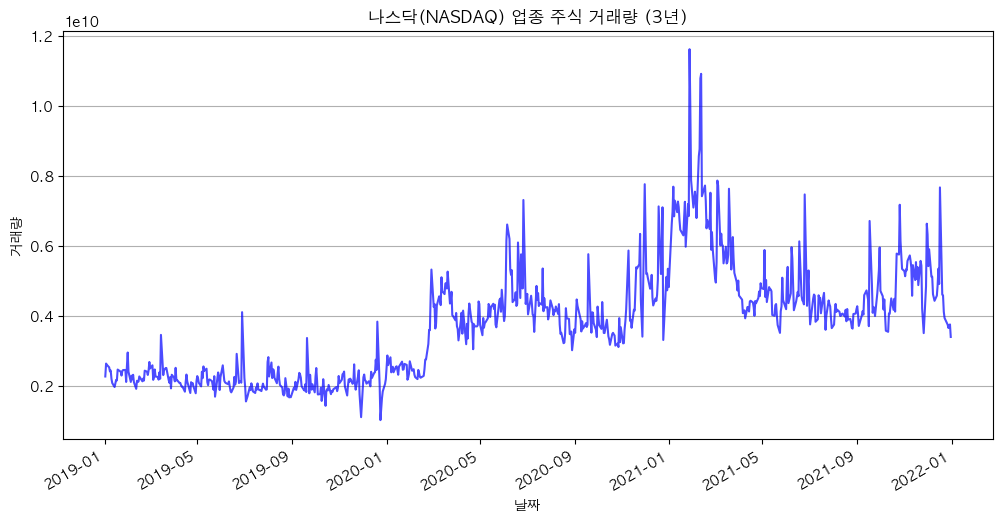

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# 나스닥(NASDAQ) 지수에 해당하는 '^IXIC' 심볼 사용
nasdaq_data = yf.download('^IXIC', start='2019-01-01', end='2022-01-01')

# 주식 거래량 차트 시각화
plt.figure(figsize=(12, 6))
nasdaq_data['Volume'].plot(color='blue', alpha=0.7)
plt.title('나스닥(NASDAQ) 업종 주식 거래량 (3년)')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.grid(axis='y')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


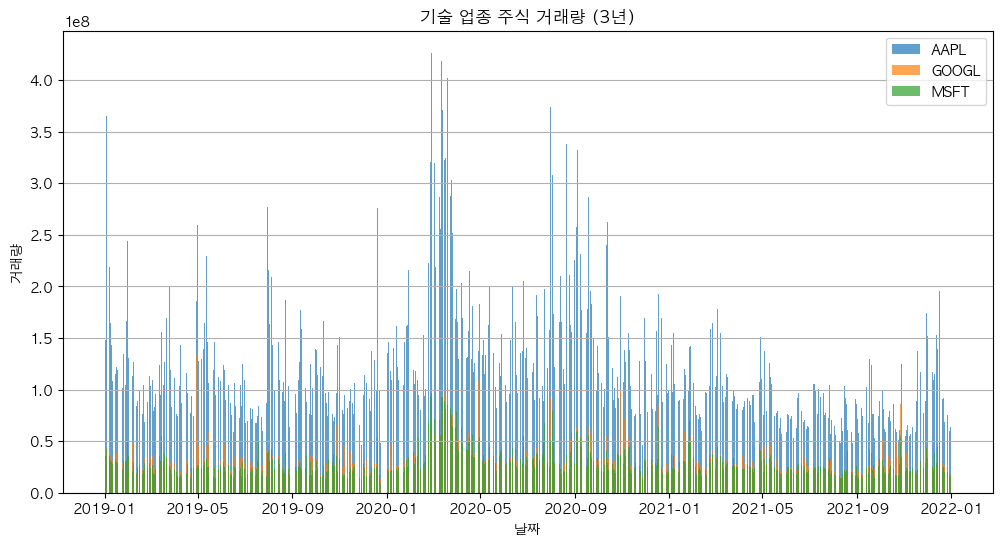

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# 각 업종을 대표하는 주가지수 심볼 사용
symbols = ['AAPL', 'GOOGL', 'MSFT']

# 주식 거래량 차트 시각화
plt.figure(figsize=(12, 6))

for symbol in symbols:
    stock_data = yf.download(symbol, start='2019-01-01', end='2022-01-01')
    plt.bar(stock_data.index, stock_data['Volume'], alpha=0.7, label=symbol)

plt.title('기술 업종 주식 거래량 (3년)')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend()
plt.grid(axis='y')
plt.show()


In [12]:
import yfinance as yf
import datetime

# 나스닥 지수의 상위 10개 기업 종목 가져오기 (예시)
top_nasdaq_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'FB', 'INTC', 'NVDA', 'NFLX', 'PYPL']

# 기간 설정 (예시: 3년 전부터 현재까지)
start_date = datetime.datetime.now() - datetime.timedelta(days=3*365)
end_date = datetime.datetime.now()

# 주식 데이터 다운로드
nasdaq_data = yf.download(top_nasdaq_symbols, start=start_date, end=end_date)['Adj Close']

# 장기 수익률 계산
returns = nasdaq_data.pct_change().mean() * 252 * 100  # 연 평균 수익률 계산

# 결과 출력
print("나스닥 상위 10개 기업의 장기 수익률:")
print(returns)


[*********************100%%**********************]  10 of 10 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


나스닥 상위 10개 기업의 장기 수익률:
Ticker
AAPL     17.908848
AMZN     13.222591
FB             NaN
GOOGL    14.439794
INTC      0.135169
MSFT     24.809933
NFLX     19.912357
NVDA     80.913076
PYPL    -34.111406
TSLA     16.863267
dtype: float64


/var/folders/3d/kdyrst7d5x92jntwy268lvj40000gn/T/ipykernel_6580/2544410259.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = nasdaq_data.pct_change().mean() * 252 * 100  # 연 평균 수익률 계산


[*********************100%%**********************]  10 of 10 completed


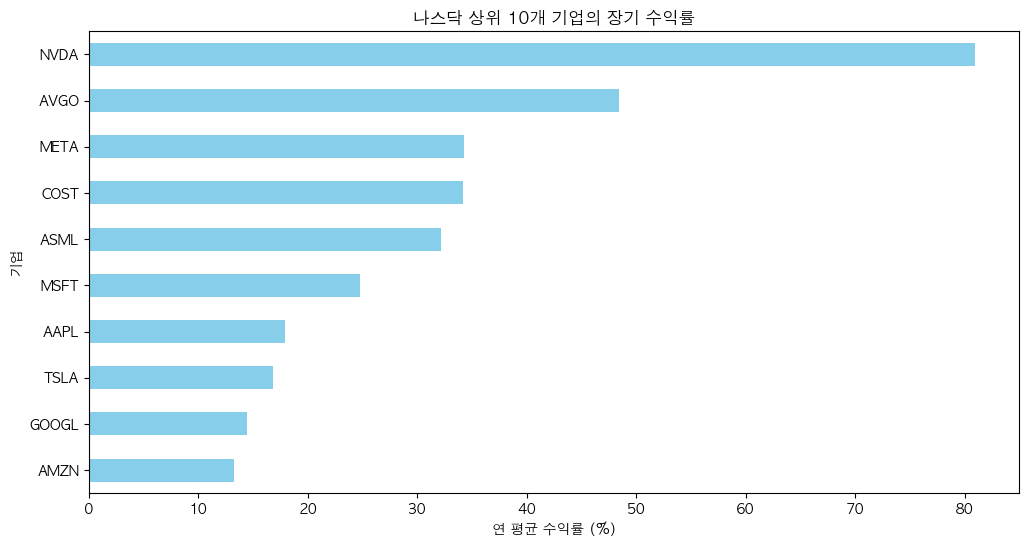

In [13]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# 나스닥 지수의 상위 10개 기업 종목 가져오기 (예시)
top_nasdaq_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'META', 'AVGO', 'NVDA', 'ASML', 'COST']

# 기간 설정 (예시: 3년 전부터 현재까지)
start_date = datetime.datetime.now() - datetime.timedelta(days=3*365)
end_date = datetime.datetime.now()

# 주식 데이터 다운로드
nasdaq_data = yf.download(top_nasdaq_symbols, start=start_date, end=end_date)['Adj Close']

# 장기 수익률 계산
returns = nasdaq_data.pct_change().mean() * 252 * 100  # 연 평균 수익률 계산

# 막대 그래프 시각화
plt.figure(figsize=(12, 6))
returns.sort_values().plot(kind='barh', color='skyblue')
plt.title('나스닥 상위 10개 기업의 장기 수익률')
plt.xlabel('연 평균 수익률 (%)')
plt.ylabel('기업')
plt.show()


In [14]:
#!pip install pandas datareader

In [15]:
#!pip install finance-datareader

In [16]:
import FinanceDataReader as fdr
import pandas as pd

In [17]:
#나스닥
nasdaq = fdr.StockListing('NASDAQ')
nasdaq['Indexes'] = 'NASDAQ'
print('나스닥:',nasdaq.shape)

#뉴욕증권거래소
nyse = fdr.StockListing('NYSE')
nyse['Indexes'] = 'NYSE'
print('뉴욕증권거래소:',nyse.shape)

#아맥스
amax = fdr.StockListing('AMEX')
amax['Indexes'] = 'AMEX'
print('아멕스:',amax.shape)

100%|██████████████████████████████████████| 3846/3846 [00:06<00:00, 556.69it/s]


나스닥: (3846, 5)


100%|██████████████████████████████████████| 2839/2839 [00:05<00:00, 550.87it/s]


뉴욕증권거래소: (2839, 5)


100%|████████████████████████████████████████| 324/324 [00:00<00:00, 655.91it/s]

아멕스: (324, 5)


In [18]:
#데이터 합치기
df = pd.concat([nasdaq,nyse,amax])

#Symbol이 중복되는 데이터 제거
df = df.drop_duplicates('Symbol')

#데이터 shape 확인
print(df.shape)

(7003, 5)


In [19]:
nasdaq.head(11)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,백화점,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스,NASDAQ
7,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
8,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ


In [20]:
#상위 10개 데이터 확인
df.head(13)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,백화점,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
6,GOOG,Alphabet Inc Class C,57201030,온라인 서비스,NASDAQ
7,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
8,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ


In [21]:
# '백화점'인 경우를 '온라인 소매업'으로 변경
df['Industry'] = df['Industry'].replace('백화점', '온라인 소매업')

# 변경된 데이터 확인
df

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,온라인 소매업,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
...,...,...,...,...,...
319,IPB,Merrill Lynch Depositor Corporate Backed Trust...,55101050,기업 금융 서비스,AMEX
320,TELZ,Tellurian 8 25 Senior Notes due 2028,50102020,"오일, 가스 탐사 및 생산",AMEX
321,LNFA.U,L F Acquisition Redeemable Units Class A,55601010,투자 지주 회사,AMEX
322,AMDI,Amphitrite Digital Inc,53301040,여가 및 오락시설,AMEX


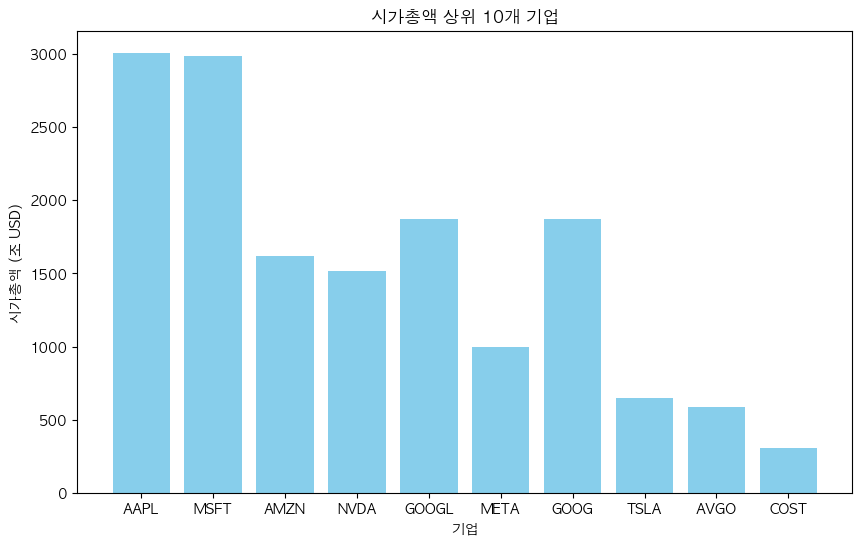

In [22]:
import matplotlib.pyplot as plt

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'GOOG': 1870,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'COST': 304.624
}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(market_caps.keys(), market_caps.values(), color='skyblue')
plt.title('시가총액 상위 10개 기업')
plt.xlabel('기업')
plt.ylabel('시가총액 (조 USD)')
plt.show()



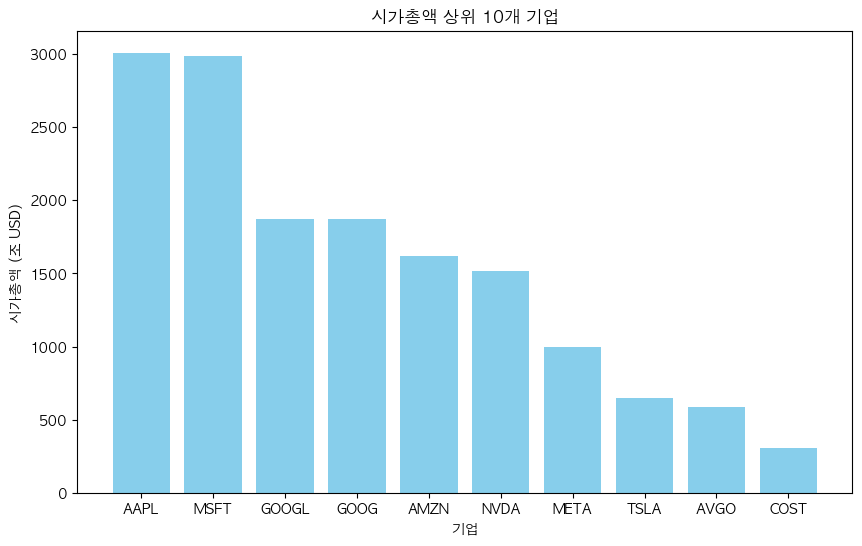

In [23]:
import matplotlib.pyplot as plt

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'GOOG': 1870,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'COST': 304.624
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sorted_market_caps.keys(), sorted_market_caps.values(), color='skyblue')
plt.title('시가총액 상위 10개 기업')
plt.xlabel('기업')
plt.ylabel('시가총액 (조 USD)')
plt.show()


In [24]:
nasdaq = nasdaq[nasdaq['Symbol'] != 'GOOG']
nasdaq.head(10)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,백화점,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
7,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
8,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ
10,COST,Costco Wholesale Corp,53402020,할인점,NASDAQ


In [25]:
# '백화점'인 경우를 '온라인 소매업'으로 변경
nasdaq['Industry'] = nasdaq['Industry'].replace('백화점', '온라인 소매업')

# 변경된 데이터 확인
nasdaq.head(10)

,Symbol,Name,IndustryCode,Industry,Indexes
0,MSFT,Microsoft Corp,57201020,소프트웨어,NASDAQ
1,AAPL,Apple Inc,57106020,전화 및 소형 장치,NASDAQ
2,NVDA,NVIDIA Corp,57101010,반도체,NASDAQ
3,AMZN,Amazon.com Inc,53402010,온라인 소매업,NASDAQ
4,META,Meta Platforms Inc,57201030,온라인 서비스,NASDAQ
5,GOOGL,Alphabet Inc Class A,57201030,온라인 서비스,NASDAQ
7,AVGO,Broadcom Inc,57101010,반도체,NASDAQ
8,TSLA,Tesla Inc,53101010,자동차 및 트럭 제조,NASDAQ
9,ASML,ASML Holding NV ADR,57101020,반도체 장비 및 테스트,NASDAQ
10,COST,Costco Wholesale Corp,53402020,할인점,NASDAQ


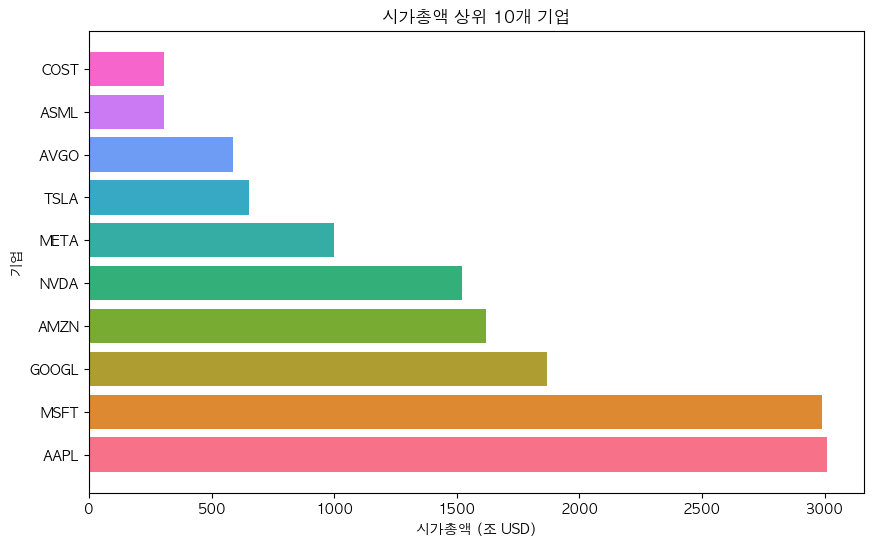

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'ASML': 305.498,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'COST': 304.624
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 다양한 색상을 사용하기 위해 seaborn의 color_palette 활용
colors = sns.color_palette('husl', n_coㄴlors=len(sorted_market_caps))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_market_caps.keys()), list(sorted_market_caps.values()), color=colors)
plt.title('시가총액 상위 10개 기업')
plt.xlabel('시가총액 (조 USD)')
plt.ylabel('기업')
plt.show()


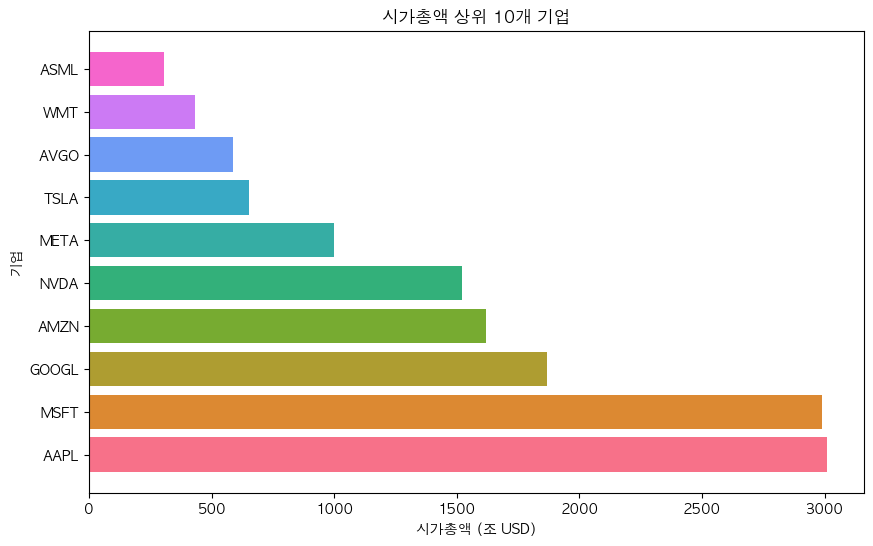

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주어진 시가총액 데이터
market_caps = {
    'AAPL': 3010,
    'MSFT': 2990,
    'AMZN': 1620,
    'NVDA': 1520,
    'GOOGL': 1870,
    'META': 1000,
    'ASML': 305.498,
    'TSLA': 651.229,
    'AVGO': 586.987,
    'WMT': 432.104
}

# 시가총액 기준으로 내림차순 정렬
sorted_market_caps = dict(sorted(market_caps.items(), key=lambda item: item[1], reverse=True))

# 다양한 색상을 사용하기 위해 seaborn의 color_palette 활용
colors = sns.color_palette('husl', n_colors=len(sorted_market_caps))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_market_caps.keys()), list(sorted_market_caps.values()), color=colors)
plt.title('시가총액 상위 10개 기업')
plt.xlabel('시가총액 (조 USD)')
plt.ylabel('기업')
plt.show()

[*********************100%%**********************]  1 of 1 completed


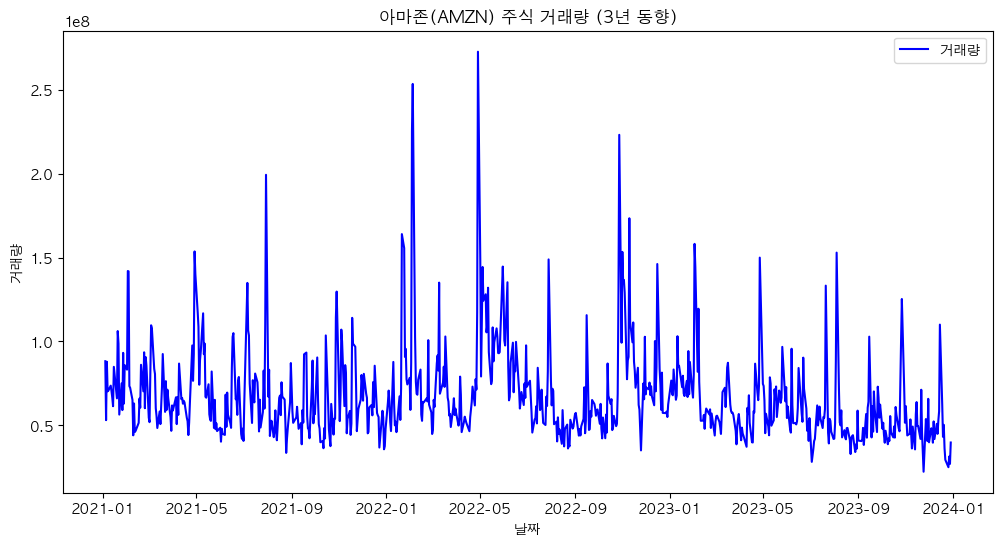

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

# 아마존 주식 데이터 다운로드 (3년간)
amzn_data = yf.download('AMZN', start='2021-01-01', end='2024-01-01')

# 주식 거래량 차트 시각화
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data['Volume'], label='거래량', color='blue')
plt.title('아마존(AMZN) 주식 거래량 (3년 동향)')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


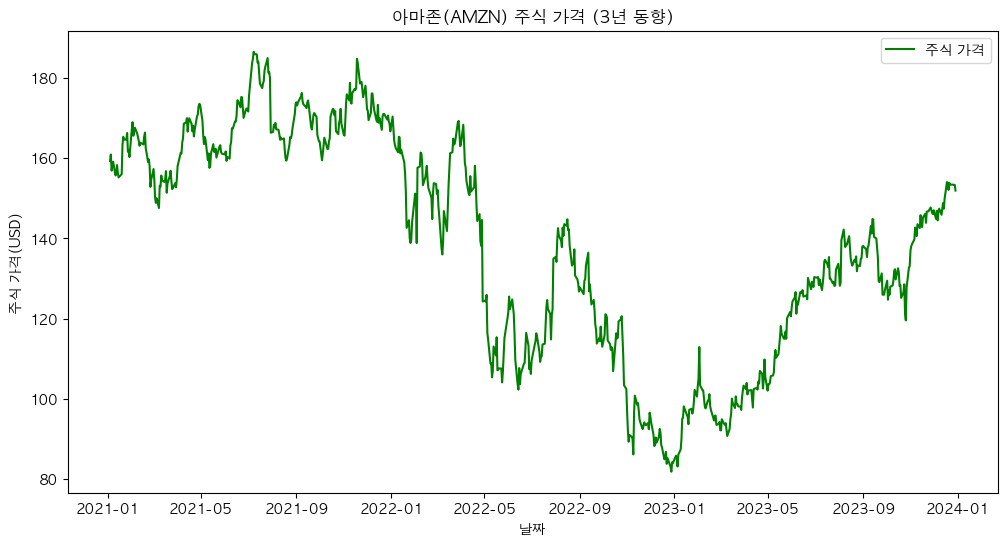

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt

# 아마존 주식 데이터 다운로드 (3년간)
amzn_data = yf.download('AMZN', start='2021-01-01', end='2024-01-01')

# 주식 가격(Adjusted Close) 차트 시각화
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data['Adj Close'], label='주식 가격', color='green')
plt.title('아마존(AMZN) 주식 가격 (3년 동향)')
plt.xlabel('날짜')
plt.ylabel('주식 가격(USD)')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


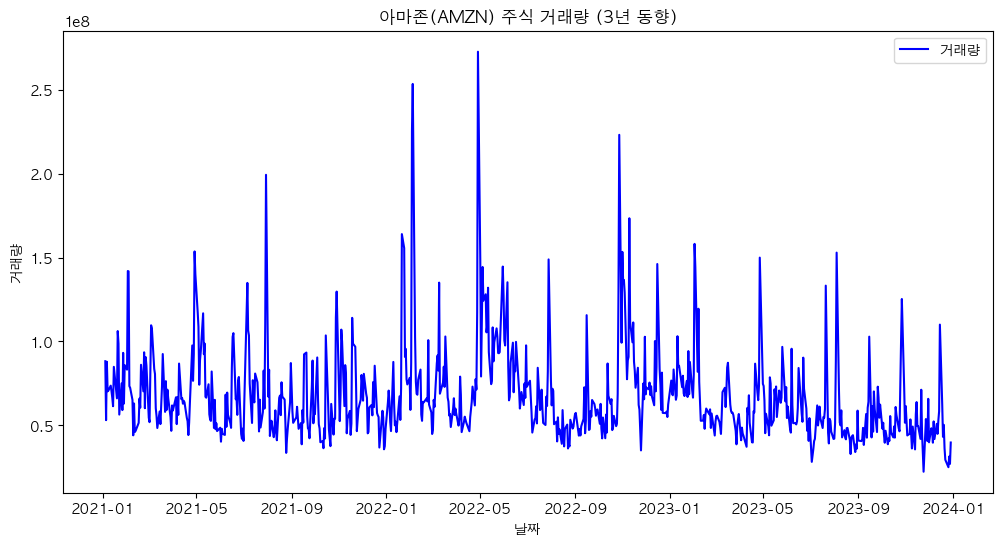

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt

# 아마존 주식 데이터 다운로드 (3년간)
amzn_data = yf.download('AMZN', start='2021-01-01', end='2024-01-01')

# 주식 거래량 차트 시각화
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data['Volume'], label='거래량', color='blue')
plt.title('아마존(AMZN) 주식 거래량 (3년 동향)')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


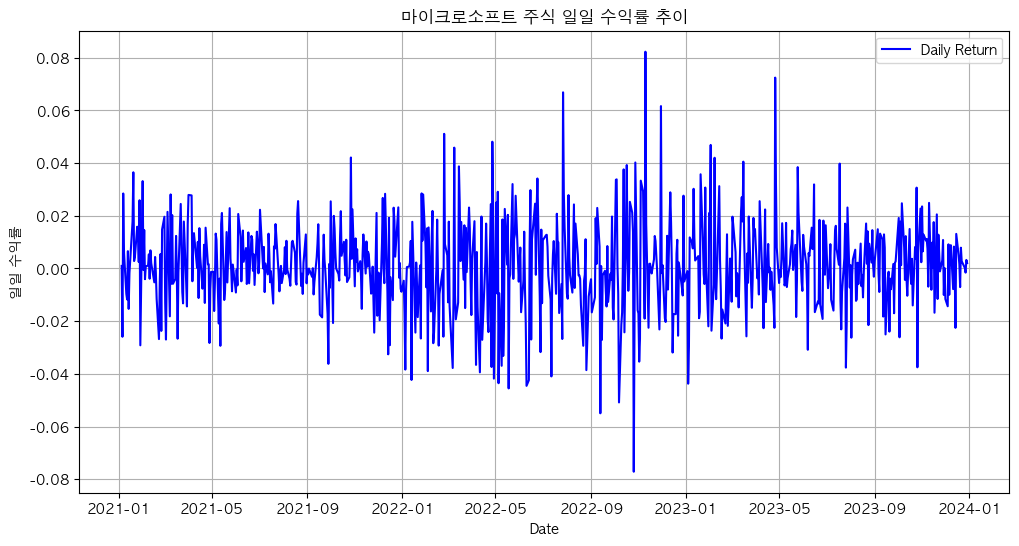

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

# 아마존 주식 데이터 다운로드
amazon_data = yf.download("AMZN", start="2021-01-01", end="2024-01-01")

# 수익률 계산
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()

# 수익률 추이 차트 그리기
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Daily_Return'], label='Daily Return', color='orange')
plt.title('마이크로소프트 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


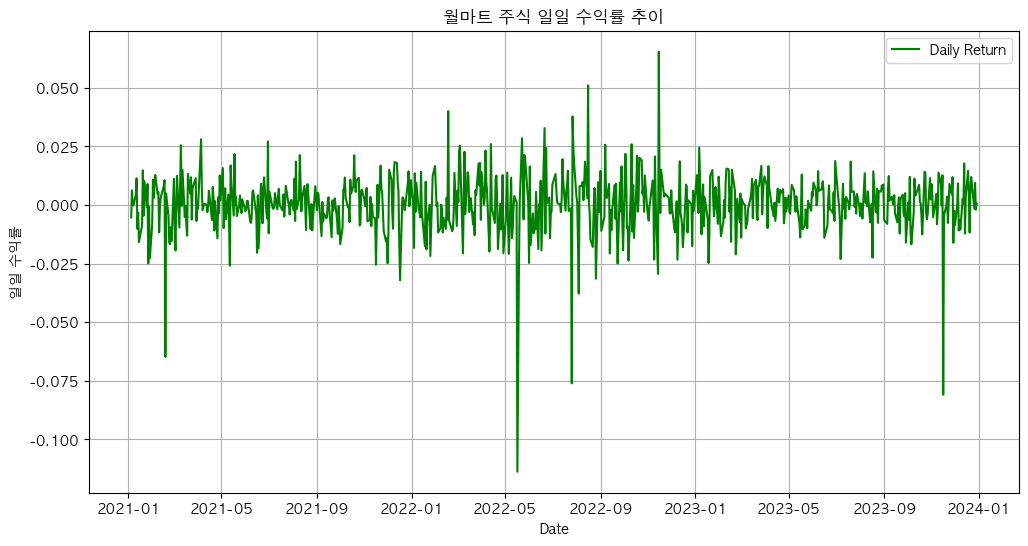

In [32]:
import yfinance as yf
import matplotlib.pyplot as plt

# 아마존 주식 데이터 다운로드
amazon_data = yf.download("WMT", start="2021-01-01", end="2024-01-01")

# 수익률 계산
amazon_data['Daily_Return'] = amazon_data['Adj Close'].pct_change()

# 수익률 추이 차트 그리기
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Daily_Return'], label='Daily Return', color='green')
plt.title('월마트 주식 일일 수익률 추이')
plt.xlabel('Date')
plt.ylabel('일일 수익률')
plt.legend()
plt.grid(True)
plt.show()
